# EDA COURSE PROJECT


# Sustainablity hackathon 

# Team Details

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import numpy as np
import seaborn as sns


In [2]:
data=[{'Name':'Amaan Khan','Roll No':240,'USN':'01FE21BCS212'},{'Name':'Adwait S','Roll No':241,'USN':'01FE21BCS222'},{'Name':'Poorva Khatawate','Roll No':248,'USN':'01FE21BCS302'},
     {'Name':'Shubhashri Shetty','Roll No':249,'USN':'01FE21BCS143'},{'Name':'Om','Roll No':238,'USN':'01FE21BCS005'}]
details=pd.DataFrame(data)
details

,Name,Roll No,USN
0,Amaan Khan,240,01FE21BCS212
1,Adwait S,241,01FE21BCS222
2,Poorva Khatawate,248,01FE21BCS302
3,Shubhashri Shetty,249,01FE21BCS143
4,Om,238,01FE21BCS005


# Data Import

In [3]:
India_test=pd.read_csv('India_test.csv')
India_train=pd.read_csv('India_train.csv')
submission=pd.read_csv('submission.csv')
USA_train=pd.read_csv('USA_train.csv')
USA_test=pd.read_csv('USA_test.csv')
USA_Commodity_prices=pd.read_csv('USA_Commodity_prices.csv')
India_soil_rainfall_30years=pd.read_csv('India_soil_rainfall_30years.csv')

In [4]:
India_train

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,23.32,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77
1,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,18.24,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74
2,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,19.69,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95
3,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,NaN,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35
4,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,28.12,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,2006,West Bengal,Jalpaiguri,0.0,0.0,0,0.00,8.68,48.92,284.72,...,33.77,44.20,25.52,11421.0,27.03,35.01,24.74,43874.0,133.67,80.70
4701,2006,West Bengal,Darjeeling,0.0,0.0,0,0.00,9.32,67.40,288.60,...,24.83,64.10,48.93,6477.0,NaN,48.47,34.63,42436.0,301.08,224.49
4702,2006,West Bengal,Malda,NaN,0.0,0,0.00,4.68,16.49,48.28,...,25.88,108.35,58.66,20547.0,25.82,99.19,53.77,94166.0,446.42,241.29
4703,2006,West Bengal,Cooch Behar,0.0,0.0,0,0.00,7.62,31.35,248.95,...,28.63,42.16,22.97,8003.0,25.74,33.22,18.43,35189.0,144.73,74.27


In [5]:
India_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Columns: 103 entries, Year to TOTAL PER HA OF GCA (Kg per ha)
dtypes: float64(99), int64(2), object(2)
memory usage: 3.7+ MB


In [6]:
India_train.describe()

,Year,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),MAY PERCIPITATION (Millimeters),JUNE PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
count,4705.000000,4438.000000,4477.000000,4705.000000,4489.000000,4458.000000,4445.000000,4485.000000,4491.000000,4471.000000,...,4486.000000,4470.000000,4471.000000,4481.000000,4479.000000,4449.000000,4467.000000,4440.000000,4443.000000,4474.000000
mean,1998.025292,655.725327,501.854367,1929.775133,18.153555,16.186774,21.222115,27.203142,52.273295,155.832713,...,27.947414,30.861284,22.573136,4415.581790,11.750246,13.755383,10.851428,49886.029955,122.181330,85.892845
std,4.893509,2294.044035,1623.216667,4919.725762,25.831879,27.118176,28.666592,47.434857,91.043304,193.457432,...,9.687258,24.060465,15.257428,6241.924452,10.083136,17.368442,12.656153,46381.811515,102.637837,63.090648
min,1990.000000,-9.000000,-9.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.230000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,0.000000,0.000000,0.000000,3.190000,2.910000,3.680000,4.140000,7.560000,56.620000,...,21.710000,14.270000,11.455000,428.000000,4.660000,4.060000,3.600000,16024.250000,50.250000,39.305000
50%,1998.000000,4.000000,0.000000,0.000000,8.480000,6.830000,10.140000,8.820000,17.730000,102.990000,...,27.080000,25.240000,19.920000,1881.000000,8.030000,7.450000,6.060000,39157.500000,92.010000,72.000000
75%,2002.000000,225.750000,117.000000,2353.000000,23.830000,17.642500,28.630000,28.150000,55.685000,186.505000,...,33.360000,40.567500,30.440000,5749.000000,16.065000,16.520000,13.300000,69162.500000,169.365000,121.525000
max,2006.000000,39702.000000,22694.000000,66671.000000,235.750000,292.430000,247.210000,636.600000,763.050000,3251.370000,...,95.260000,226.120000,143.030000,50904.000000,94.270000,253.760000,226.540000,375992.000000,826.060000,612.130000


In [7]:
India_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Columns: 103 entries, Year to TOTAL PER HA OF GCA (Kg per ha)
dtypes: float64(99), int64(2), object(2)
memory usage: 1.9+ MB


In [8]:
India_train.describe()

,Year,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),MAY PERCIPITATION (Millimeters),JUNE PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
count,4705.000000,4438.000000,4477.000000,4705.000000,4489.000000,4458.000000,4445.000000,4485.000000,4491.000000,4471.000000,...,4486.000000,4470.000000,4471.000000,4481.000000,4479.000000,4449.000000,4467.000000,4440.000000,4443.000000,4474.000000
mean,1998.025292,655.725327,501.854367,1929.775133,18.153555,16.186774,21.222115,27.203142,52.273295,155.832713,...,27.947414,30.861284,22.573136,4415.581790,11.750246,13.755383,10.851428,49886.029955,122.181330,85.892845
std,4.893509,2294.044035,1623.216667,4919.725762,25.831879,27.118176,28.666592,47.434857,91.043304,193.457432,...,9.687258,24.060465,15.257428,6241.924452,10.083136,17.368442,12.656153,46381.811515,102.637837,63.090648
min,1990.000000,-9.000000,-9.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.230000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,0.000000,0.000000,0.000000,3.190000,2.910000,3.680000,4.140000,7.560000,56.620000,...,21.710000,14.270000,11.455000,428.000000,4.660000,4.060000,3.600000,16024.250000,50.250000,39.305000
50%,1998.000000,4.000000,0.000000,0.000000,8.480000,6.830000,10.140000,8.820000,17.730000,102.990000,...,27.080000,25.240000,19.920000,1881.000000,8.030000,7.450000,6.060000,39157.500000,92.010000,72.000000
75%,2002.000000,225.750000,117.000000,2353.000000,23.830000,17.642500,28.630000,28.150000,55.685000,186.505000,...,33.360000,40.567500,30.440000,5749.000000,16.065000,16.520000,13.300000,69162.500000,169.365000,121.525000
max,2006.000000,39702.000000,22694.000000,66671.000000,235.750000,292.430000,247.210000,636.600000,763.050000,3251.370000,...,95.260000,226.120000,143.030000,50904.000000,94.270000,253.760000,226.540000,375992.000000,826.060000,612.130000


In [9]:
USA_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              400 non-null    int64  
 1   State                                             380 non-null    object 
 2   Planted (1000 Acres)                              386 non-null    object 
 3   Harvested (1000 Acres)                            385 non-null    object 
 4   Yield (Pounds/ Harvested Area)                    400 non-null    int64  
 5   Average Temperature Value                         366 non-null    float64
 6   Average Temperature Anomaly                       379 non-null    float64
 7   Maximum Temperature Value                         368 non-null    float64
 8   Maximum Temperature Anomaly                       379 non-null    float64
 9   Minimum Temperature V

In [10]:
USA_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              560 non-null    int64  
 1   State                                             528 non-null    object 
 2   Planted (1000 Acres)                              537 non-null    object 
 3   Harvested (1000 Acres)                            540 non-null    object 
 4   Yield (Pounds/ Harvested Area)                    560 non-null    int64  
 5   Average Temperature Value                         532 non-null    float64
 6   Average Temperature Anomaly                       529 non-null    float64
 7   Maximum Temperature Value                         538 non-null    float64
 8   Maximum Temperature Anomaly                       527 non-null    float64
 9   Minimum Temperature V

In [11]:
USA_test.describe()

,Year,Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,Precipitation Value,Precipitation Anomaly,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
count,400.000000,400.0,366.000000,379.000000,368.000000,379.000000,384.000000,376.000000,384.000000,377.000000,...,369.000000,381.000000,377.000000,382.000000,374.000000,368.000000,386.000000,374.000000,369.000000,381.000000
mean,2012.500000,0.0,62.814822,3.054617,74.599207,3.117458,51.070095,3.250421,5.846424,2.682011,...,274.178862,-9.844488,2.517796,2.110089,2.537433,2.125546,2.358085,2.266889,2.472035,2.358780
std,5.773503,0.0,5.282566,1.595499,5.080334,1.720398,5.931185,1.541782,1.769862,1.215335,...,108.818445,24.752921,2.588490,2.387040,2.678072,2.502230,2.446377,2.304705,1.541536,1.446587
min,2003.000000,0.0,50.566667,-0.983333,63.075000,-0.733333,37.825000,-0.600000,1.546667,-0.499167,...,40.583333,-86.833333,-4.756667,-4.596667,-3.881667,-4.300000,-4.665833,-3.385000,-1.122500,-1.115000
25%,2007.750000,0.0,58.806250,1.845833,70.989583,1.887500,47.189583,2.166667,4.739792,1.803333,...,198.833333,-26.166667,0.535833,0.402708,0.562292,0.350000,0.626667,0.594167,1.290833,1.209167
50%,2012.500000,0.0,62.895833,3.083333,74.779167,3.008333,50.754167,3.220833,6.001667,2.768333,...,269.416667,-9.000000,2.708333,2.202083,2.563333,2.029583,2.589167,2.520833,2.578333,2.410833
75%,2017.250000,0.0,66.616667,4.225000,78.337500,4.416667,55.527083,4.291667,7.114167,3.663333,...,351.166667,6.833333,4.304167,3.860833,4.603958,3.919167,4.097500,4.058958,3.666667,3.372500
max,2022.000000,0.0,77.183333,7.450000,87.225000,8.600000,67.075000,6.900000,9.695833,5.686667,...,601.000000,80.166667,8.705833,7.722500,8.434167,8.335000,8.021667,7.087500,6.048333,5.998333


In [12]:
USA_train.describe()

,Year,Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,Precipitation Value,Precipitation Anomaly,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
count,560.000000,560.000000,532.000000,529.000000,538.000000,527.000000,533.000000,534.000000,533.000000,539.000000,...,535.000000,530.000000,534.000000,536.000000,530.000000,538.000000,530.000000,538.000000,530.000000,539.000000
mean,1988.500000,538.010714,61.607221,2.016005,73.572878,2.121837,49.818261,1.996941,5.882753,2.530091,...,294.366199,11.006761,2.778761,2.626225,2.795374,2.584857,2.776687,2.657643,2.656437,2.563550
std,8.084969,321.951007,5.325217,1.521716,5.155871,1.597006,5.732206,1.587296,1.741681,1.223086,...,113.144409,25.100424,2.209194,2.132811,2.347275,2.399436,2.170548,2.209566,1.364614,1.398117
min,1975.000000,0.000000,50.108333,-1.683333,60.683333,-1.958333,36.300000,-2.416667,1.520000,-0.113333,...,37.000000,-87.250000,-3.079167,-2.780833,-2.623333,-3.364167,-2.972500,-3.124167,-0.697500,-0.665000
25%,1981.750000,370.000000,57.487500,0.850000,69.691667,1.045833,46.058333,0.779167,4.832500,1.569583,...,216.125000,-6.125000,1.188542,1.122292,1.233333,0.900000,1.370000,1.160625,1.660625,1.479583
50%,1988.500000,547.000000,61.475000,2.100000,73.591667,2.141667,49.558333,1.933333,5.925000,2.504167,...,287.416667,11.041667,2.792083,2.527917,2.791250,2.560000,2.740000,2.430833,2.595417,2.683333
75%,1995.250000,716.000000,65.400000,3.133333,77.381250,3.241667,53.875000,3.116667,7.217500,3.527083,...,379.666667,27.729167,4.152292,3.885208,4.312500,4.247917,4.145208,4.190625,3.605417,3.566250
max,2002.000000,1470.000000,75.550000,5.866667,86.608333,6.575000,64.791667,6.733333,10.623333,5.207500,...,598.333333,79.500000,9.797500,9.265000,9.635833,10.426667,10.410000,11.182500,6.330833,7.102500


In [13]:
India_soil_rainfall_30years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   State Name                               313 non-null    object
 1   Dist Name                                313 non-null    object
 2   SOIL TYPE PERCENT (Percent)              310 non-null    object
 3   Year_Rainfall                            313 non-null    object
 4   JANUARY NORMAL RAINFALL (Millimeters)    313 non-null    int64 
 5   FEBRUARY NORMAL RAINFALL (Millimeters)   313 non-null    int64 
 6   MARCH NORMAL RAINFALL (Millimeters)      313 non-null    int64 
 7   APRIL NORMAL RAINFALL (Millimeters)      313 non-null    int64 
 8   MAY NORMAL RAINFALL (Millimeters)        313 non-null    int64 
 9   JUNE NORMAL RAINFALL (Millimeters)       313 non-null    int64 
 10  JULY NORMAL RAINFALL (Millimeters)       313 non-null    int64

In [14]:
India_soil_rainfall_30years.describe()

,JANUARY NORMAL RAINFALL (Millimeters),FEBRUARY NORMAL RAINFALL (Millimeters),MARCH NORMAL RAINFALL (Millimeters),APRIL NORMAL RAINFALL (Millimeters),MAY NORMAL RAINFALL (Millimeters),JUNE NORMAL RAINFALL (Millimeters),JULY NORMAL RAINFALL (Millimeters),AUGUST NORMAL RAINFALL (Millimeters),SEPTEMBER NORMAL RAINFALL (Millimeters),OCTOBER NORMAL RAINFALL (Millimeters),NOVEMBER NORMAL RAINFALL (Millimeters),DECEMBER NORMAL RAINFALL (Millimeters),ANNUAL NORMAL RAINFALL (Millimeters)
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,19.319489,17.485623,19.958466,26.840256,53.603834,168.709265,313.715655,274.261981,185.028754,82.722045,30.591054,12.293930,1204.571885
std,19.869288,18.544661,25.841508,41.326173,79.142011,167.118879,181.808910,128.288743,78.454477,70.420414,53.261921,23.337337,636.098733
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.000000,5.000000,7.000000,4.000000,11.000000,77.000000,203.000000,175.000000,137.000000,37.000000,5.000000,3.000000,813.000000
50%,14.000000,14.000000,12.000000,12.000000,18.000000,124.000000,302.000000,285.000000,185.000000,58.000000,13.000000,5.000000,1079.000000
75%,24.000000,22.000000,22.000000,31.000000,57.000000,185.000000,366.000000,342.000000,229.000000,110.000000,29.000000,10.000000,1391.000000
max,146.000000,141.000000,192.000000,365.000000,440.000000,982.000000,1106.000000,765.000000,537.000000,379.000000,458.000000,239.000000,3667.000000


# Data Cleaning

# India_train

In [15]:
India_train.isnull().sum()

Year                                  0
State Name                            0
Dist Name                             0
COTTON AREA (1000 ha)               267
COTTON PRODUCTION (1000 tons)       228
                                   ... 
POTASH PER HA OF NCA (Kg per ha)    256
POTASH PER HA OF GCA (Kg per ha)    238
TOTAL CONSUMPTION (tons)            265
TOTAL PER HA OF NCA (Kg per ha)     262
TOTAL PER HA OF GCA (Kg per ha)     231
Length: 103, dtype: int64

In [16]:
India_train= India_train.astype(float, errors='ignore')
India_train.dtypes

Year                                float64
State Name                           object
Dist Name                            object
COTTON AREA (1000 ha)               float64
COTTON PRODUCTION (1000 tons)       float64
                                     ...   
POTASH PER HA OF NCA (Kg per ha)    float64
POTASH PER HA OF GCA (Kg per ha)    float64
TOTAL CONSUMPTION (tons)            float64
TOTAL PER HA OF NCA (Kg per ha)     float64
TOTAL PER HA OF GCA (Kg per ha)     float64
Length: 103, dtype: object

In [17]:
#Calculate the mean value for the "COTTON AREA (1000 ha)" column 
avg_cotton_area = India_train["COTTON AREA (1000 ha)"].astype("float").mean(axis=0)
India_train["COTTON AREA (1000 ha)"].replace(np.nan, avg_cotton_area, inplace=True)

In [18]:
#Calculate the mean value for the "COTTON PRODUCTION (1000 tons)" column 
avg_cotton_prod = India_train["COTTON PRODUCTION (1000 tons)"].astype("float").mean(axis=0)
India_train["COTTON PRODUCTION (1000 tons)"].replace(np.nan, avg_cotton_prod, inplace=True)

In [19]:
#Calculate the mean value for the "JANUARY PERCIPITATION (Millimeters)" column 
avg_jan_prec = India_train["JANUARY PERCIPITATION (Millimeters)"].astype("float").mean(axis=0)
India_train["JANUARY PERCIPITATION (Millimeters)"].replace(np.nan, avg_jan_prec, inplace=True)

In [20]:
#Calculate the mean value for the "FEBRUARY PERCIPITATION (Millimeters)" column 
avg_feb_prec = India_train["FEBRUARY PERCIPITATION (Millimeters)"].astype("float").mean(axis=0)
India_train["FEBRUARY PERCIPITATION (Millimeters)"].replace(np.nan, avg_feb_prec, inplace=True)

In [21]:
#Calculate the mean value for the "MARCH PERCIPITATION (Millimeters)" column 
avg_mar_prec = India_train["MARCH PERCIPITATION (Millimeters)"].astype("float").mean(axis=0)
India_train["MARCH PERCIPITATION (Millimeters)"].replace(np.nan, avg_mar_prec, inplace=True)

In [22]:
#Calculate the mean value for the "APRIL PERCIPITATION (Millimeters)" column 
avg_apl_prec = India_train["APRIL PERCIPITATION (Millimeters)"].astype("float").mean(axis=0)
India_train["APRIL PERCIPITATION (Millimeters)"].replace(np.nan, avg_apl_prec, inplace=True)

In [23]:
#Calculate the mean value for the "JUNE PERCIPITATION (Millimeters)" column 
avg_jun_prec = India_train["JUNE PERCIPITATION (Millimeters)"].astype("float").mean(axis=0)
India_train["JUNE PERCIPITATION (Millimeters)"].replace(np.nan, avg_jun_prec, inplace=True)

In [24]:
#Calculate the mean value for the "JULY PERCIPITATION (Millimeters)" column 
avg_jul_prec = India_train["JULY PERCIPITATION (Millimeters)"].astype("float").mean(axis=0)
India_train["JULY PERCIPITATION (Millimeters)"].replace(np.nan, avg_jul_prec, inplace=True)

In [25]:
#Calculate the mean value for the "MAY PERCIPITATION (Millimeters)" column 
avg_may_prec = India_train["MAY PERCIPITATION (Millimeters)"].astype("float").mean(axis=0)
India_train["MAY PERCIPITATION (Millimeters)"].replace(np.nan, avg_may_prec, inplace=True)

In [26]:
#Calculate the mean value for the "JULY PERCIPITATION (Millimeters)" column 
avg_jul_prec = India_train["JULY PERCIPITATION (Millimeters)"].astype("float").mean(axis=0)
India_train["JULY PERCIPITATION (Millimeters)"].replace(np.nan, avg_jul_prec, inplace=True)

In [27]:
#Calculate the mean value for the "AUGUST PERCIPITATION (Millimeters)" column 
avg_aug_prec = India_train["AUGUST PERCIPITATION (Millimeters)"].astype("float").mean(axis=0)
India_train["AUGUST PERCIPITATION (Millimeters)"].replace(np.nan, avg_aug_prec, inplace=True)

In [28]:
#Calculate the mean value for the "SEPTEMBER PERCIPITATION (Millimeters)" column 
avg_sep_prec = India_train["SEPTEMBER PERCIPITATION (Millimeters)"].astype("float").mean(axis=0)
India_train["SEPTEMBER PERCIPITATION (Millimeters)"].replace(np.nan, avg_sep_prec, inplace=True)

In [29]:
#Calculate the mean value for the "OCTOBER PERCIPITATION (Millimeters)" column 
avg_oct_prec = India_train["OCTOBER PERCIPITATION (Millimeters)"].astype("float").mean(axis=0)
India_train["OCTOBER PERCIPITATION (Millimeters)"].replace(np.nan, avg_oct_prec, inplace=True)

In [30]:
#Calculate the mean value for the "NOVEMBER PERCIPITATION (Millimeters)" column 
avg_nov_prec = India_train["NOVEMBER PERCIPITATION (Millimeters)"].astype("float").mean(axis=0)
India_train["NOVEMBER PERCIPITATION (Millimeters)"].replace(np.nan, avg_nov_prec, inplace=True)

In [31]:
#Calculate the mean value for the "DECEMBER PERCIPITATION (Millimeters)" column 
avg_dec_prec = India_train["DECEMBER PERCIPITATION (Millimeters)"].astype("float").mean(axis=0)
India_train["DECEMBER PERCIPITATION (Millimeters)"].replace(np.nan, avg_dec_prec, inplace=True)

In [32]:
#Calculate the mean value for the "JANUARY MINIMUM (Centigrate)" column 
avg_jan_min = India_train["JANUARY MINIMUM (Centigrate)"].astype("float").mean(axis=0)
India_train["JANUARY MINIMUM (Centigrate)"].replace(np.nan, avg_jan_min, inplace=True)

In [33]:
#Calculate the mean value for the "FEBRUARY MINIMUM (Centigrate)" column 
avg_feb_min = India_train["FEBRUARY MINIMUM (Centigrate)"].astype("float").mean(axis=0)
India_train["FEBRUARY MINIMUM (Centigrate)"].replace(np.nan, avg_feb_min, inplace=True)

In [34]:
avg_march=India_train['MARCH MINIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['MARCH MINIMUM (Centigrate)'].replace(np.nan,avg_march,inplace=True)
avg_march1=India_train['APRIL MINIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['APRIL MINIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['MAY MINIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['MAY MINIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['JUNE MINIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['JUNE MINIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['JULY MINIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['JULY MINIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['AUGUST MINIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['AUGUST MINIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['SEPTEMBER MINIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['SEPTEMBER MINIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['OCTOBER MINIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['OCTOBER MINIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['NOVEMBER MINIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['NOVEMBER MINIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['DECEMBER MINIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['DECEMBER MINIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['JANUARY MAXIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['JANUARY MAXIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['FEBRUARY MAXIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['FEBRUARY MAXIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['MARCH MAXIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['MARCH MAXIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['APRIL MAXIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['APRIL MAXIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['MAY MAXIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['MAY MAXIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['JUNE MAXIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['JUNE MAXIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['JULY MAXIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['JULY MAXIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['AUGUST MAXIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['AUGUST MAXIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['SEPTEMBER MAXIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['SEPTEMBER MAXIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['OCTOBER MAXIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['OCTOBER MAXIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
avg_march1=India_train['NOVEMBER MAXIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['NOVEMBER MAXIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)

In [35]:
avg_for = India_train["FOREST AREA (1000 ha)"].astype("float").mean(axis=0)
India_train["FOREST AREA (1000 ha)"].replace(np.nan, avg_for, inplace=True)

avg_b = India_train["BARREN AND UNCULTIVABLE LAND AREA (1000 ha)"].astype("float").mean(axis=0)
India_train["BARREN AND UNCULTIVABLE LAND AREA (1000 ha)"].replace(np.nan, avg_b, inplace=True)

avg_l = India_train["LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha)"].astype("float").mean(axis=0)
India_train["LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha)"].replace(np.nan, avg_l, inplace=True)

avg_c = India_train["CULTIVABLE WASTE LAND AREA (1000 ha)"].astype("float").mean(axis=0)
India_train["CULTIVABLE WASTE LAND AREA (1000 ha)"].replace(np.nan, avg_c, inplace=True)

avg_p = India_train["PERMANENT PASTURES AREA (1000 ha)"].astype("float").mean(axis=0)
India_train["PERMANENT PASTURES AREA (1000 ha)"].replace(np.nan, avg_p, inplace=True)

avg_o = India_train["OTHER FALLOW AREA (1000 ha)"].astype("float").mean(axis=0)
India_train["OTHER FALLOW AREA (1000 ha)"].replace(np.nan, avg_o, inplace=True)

avg_cu = India_train["CURRENT FALLOW AREA (1000 ha)"].astype("float").mean(axis=0)
India_train["CURRENT FALLOW AREA (1000 ha)"].replace(np.nan, avg_cu, inplace=True)

avg_n = India_train["NET CROPPED AREA (1000 ha)"].astype("float").mean(axis=0)
India_train["NET CROPPED AREA (1000 ha)"].replace(np.nan, avg_n, inplace=True)

avg_g = India_train["GROSS CROPPED AREA (1000 ha)"].astype("float").mean(axis=0)
India_train["GROSS CROPPED AREA (1000 ha)"].replace(np.nan, avg_g, inplace=True)

avg_n = India_train["NITROGEN CONSUMPTION (tons)"].astype("float").mean(axis=0)
India_train["NITROGEN CONSUMPTION (tons)"].replace(np.nan, avg_n, inplace=True)

avg_nt = India_train["NITROGEN SHARE IN NPK (Percent)"].astype("float").mean(axis=0)
India_train["NITROGEN SHARE IN NPK (Percent)"].replace(np.nan, avg_nt, inplace=True)

avg_nca = India_train["NITROGEN PER HA OF NCA (Kg per ha)"].astype("float").mean(axis=0)
India_train["NITROGEN PER HA OF NCA (Kg per ha)"].replace(np.nan, avg_nca, inplace=True)

avg_gca = India_train["NITROGEN PER HA OF GCA (Kg per ha)"].astype("float").mean(axis=0)
India_train["NITROGEN PER HA OF GCA (Kg per ha)"].replace(np.nan, avg_gca, inplace=True)

avg_pho = India_train["PHOSPHATE CONSUMPTION (tons)"].astype("float").mean(axis=0)
India_train["PHOSPHATE CONSUMPTION (tons)"].replace(np.nan, avg_pho, inplace=True)

avg_npk = India_train["PHOSPHATE SHARE IN NPK (Percent)"].astype("float").mean(axis=0)
India_train["PHOSPHATE SHARE IN NPK (Percent)"].replace(np.nan, avg_npk, inplace=True)

avg_crp = India_train["CROPING INTENSITY (Percent)"].astype("float").mean(axis=0)
India_train["CROPING INTENSITY (Percent)"].replace(np.nan, avg_crp, inplace=True)

avg_crp = India_train["PHOSPHATE PER HA OF NCA (Kg per ha)"].astype("float").mean(axis=0)
India_train["PHOSPHATE PER HA OF NCA (Kg per ha)"].replace(np.nan, avg_crp, inplace=True)

avg_crp = India_train["PHOSPHATE PER HA OF GCA (Kg per ha)"].astype("float").mean(axis=0)
India_train["PHOSPHATE PER HA OF GCA (Kg per ha)"].replace(np.nan, avg_crp, inplace=True)

avg_crp = India_train["POTASH CONSUMPTION (tons)"].astype("float").mean(axis=0)
India_train["POTASH CONSUMPTION (tons)"].replace(np.nan, avg_crp, inplace=True)

avg_crp = India_train["POTASH SHARE IN NPK (Percent)"].astype("float").mean(axis=0)
India_train["POTASH SHARE IN NPK (Percent)"].replace(np.nan, avg_crp, inplace=True)

avg_crp = India_train["POTASH PER HA OF NCA (Kg per ha)"].astype("float").mean(axis=0)
India_train["POTASH PER HA OF NCA (Kg per ha)"].replace(np.nan, avg_crp, inplace=True)

avg_crp = India_train["POTASH PER HA OF GCA (Kg per ha)"].astype("float").mean(axis=0)
India_train["POTASH PER HA OF GCA (Kg per ha)"].replace(np.nan, avg_crp, inplace=True)

avg_crp = India_train["TOTAL CONSUMPTION (tons)"].astype("float").mean(axis=0)
India_train["TOTAL CONSUMPTION (tons)"].replace(np.nan, avg_crp, inplace=True)

avg_crp = India_train["TOTAL PER HA OF NCA (Kg per ha)"].astype("float").mean(axis=0)
India_train["TOTAL PER HA OF NCA (Kg per ha)"].replace(np.nan, avg_crp, inplace=True)

avg_crp = India_train["TOTAL PER HA OF GCA (Kg per ha)"].astype("float").mean(axis=0)
India_train["TOTAL PER HA OF GCA (Kg per ha)"].replace(np.nan, avg_crp, inplace=True)


In [36]:
India_train.isnull().sum()

Year                                0
State Name                          0
Dist Name                           0
COTTON AREA (1000 ha)               0
COTTON PRODUCTION (1000 tons)       0
                                   ..
POTASH PER HA OF NCA (Kg per ha)    0
POTASH PER HA OF GCA (Kg per ha)    0
TOTAL CONSUMPTION (tons)            0
TOTAL PER HA OF NCA (Kg per ha)     0
TOTAL PER HA OF GCA (Kg per ha)     0
Length: 103, dtype: int64

In [37]:
avg_dec_max=India_train['DECEMBER MAXIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['DECEMBER MAXIMUM (Centigrate)'].replace(np.nan,avg_dec_max,inplace=True)
avg_jan_deficit=India_train['JANUARY WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['JANUARY WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['FEBRUARY WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['FEBRUARY WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['MARCH WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['MARCH WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['APRIL WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['APRIL WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['MAY WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['MAY WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['JUNE WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['JUNE WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['JULY WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['JULY WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['AUGUST WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['AUGUST WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['OCTOBER WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['OCTOBER WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['NOVEMBER WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['NOVEMBER WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['DECEMBER WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['DECEMBER WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['JANUARY ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['JANUARY ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['FEBRUARY ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['FEBRUARY ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['MARCH ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['MARCH ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['APRIL ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['APRIL ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['MAY ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['MAY ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['JUNE ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['JUNE ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['JULY ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['JULY ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['AUGUST ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['AUGUST ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['SEPTEMBER ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['SEPTEMBER ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['OCTOBER ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['OCTOBER ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
avg_jan_deficit=India_train['NOVEMBER ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['NOVEMBER ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)


In [38]:
avg_cotton_area = India_train["JULY ACTUAL (Millimeters)"].astype("float").mean(axis=0)
India_train["JULY ACTUAL (Millimeters)"].replace(np.nan, avg_cotton_area, inplace=True)
avg_cotton_prod = India_train["AUGUST ACTUAL (Millimeters)"].astype("float").mean(axis=0)
India_train["AUGUST ACTUAL (Millimeters)"].replace(np.nan, avg_cotton_prod, inplace=True)
avg_cotton_prod = India_train["SEPTEMBER ACTUAL (Millimeters)"].astype("float").mean(axis=0)
India_train["SEPTEMBER ACTUAL (Millimeters)"].replace(np.nan, avg_cotton_prod, inplace=True)
avg_cotton_area = India_train["OCTOBER ACTUAL (Millimeters)"].astype("float").mean(axis=0)
India_train["OCTOBER ACTUAL (Millimeters)"].replace(np.nan, avg_cotton_area, inplace=True)
avg_cotton_area = India_train["NOVEMBER ACTUAL (Millimeters)"].astype("float").mean(axis=0)
India_train["NOVEMBER ACTUAL (Millimeters)"].replace(np.nan, avg_cotton_area, inplace=True)
avg_cotton_area = India_train["DECEMBER ACTUAL (Millimeters)"].astype("float").mean(axis=0)
India_train["DECEMBER ACTUAL (Millimeters)"].replace(np.nan, avg_cotton_area, inplace=True)
avg_cotton_area = India_train["JANUARY POTENTIAL (Millimeters)"].astype("float").mean(axis=0)
India_train["JANUARY POTENTIAL (Millimeters)"].replace(np.nan, avg_cotton_area, inplace=True)
avg_cotton_area = India_train["FEBRUARY POTENTIAL (Millimeters)"].astype("float").mean(axis=0)
India_train["FEBRUARY POTENTIAL (Millimeters)"].replace(np.nan, avg_cotton_area, inplace=True)
avg_cotton_area = India_train["MARCH POTENTIAL (Millimeters)"].astype("float").mean(axis=0)
India_train["MARCH POTENTIAL (Millimeters)"].replace(np.nan, avg_cotton_area, inplace=True)
avg_cotton_area = India_train["APRIL POTENTIAL (Millimeters)"].astype("float").mean(axis=0)
India_train["APRIL POTENTIAL (Millimeters)"].replace(np.nan, avg_cotton_area, inplace=True)
avg_cotton_area = India_train["MAY POTENTIAL (Millimeters)"].astype("float").mean(axis=0)
India_train["MAY POTENTIAL (Millimeters)"].replace(np.nan, avg_cotton_area, inplace=True)
avg_cotton_area = India_train["JUNE POTENTIAL (Millimeters)"].astype("float").mean(axis=0)
India_train["JUNE POTENTIAL (Millimeters)"].replace(np.nan, avg_cotton_area, inplace=True)
avg_cotton_area = India_train["JULY POTENTIAL (Millimeters)"].astype("float").mean(axis=0)
India_train["JULY POTENTIAL (Millimeters)"].replace(np.nan, avg_cotton_area, inplace=True)
avg_cotton_area = India_train["AUGUST POTENTIAL (Millimeters)"].astype("float").mean(axis=0)
India_train["AUGUST POTENTIAL (Millimeters)"].replace(np.nan, avg_cotton_area, inplace=True)
avg_cotton_area = India_train["SEPTEMBER POTENTIAL (Millimeters)"].astype("float").mean(axis=0)
India_train["SEPTEMBER POTENTIAL (Millimeters)"].replace(np.nan, avg_cotton_area, inplace=True)
avg_cotton_area = India_train["OCTOBER POTENTIAL (Millimeters)"].astype("float").mean(axis=0)
India_train["OCTOBER POTENTIAL (Millimeters)"].replace(np.nan, avg_cotton_area, inplace=True)
avg_cotton_area = India_train["NOVEMBER POTENTIAL (Millimeters)"].astype("float").mean(axis=0)
India_train["NOVEMBER POTENTIAL (Millimeters)"].replace(np.nan, avg_cotton_area, inplace=True)
avg_cotton_area = India_train["DECEMBER POTENTIAL (Millimeters)"].astype("float").mean(axis=0)
India_train["DECEMBER POTENTIAL (Millimeters)"].replace(np.nan, avg_cotton_area, inplace=True)
avg_cotton_area = India_train["TOTAL AREA (1000 ha)"].astype("float").mean(axis=0)
India_train["TOTAL AREA (1000 ha)"].replace(np.nan, avg_cotton_area, inplace=True)
avg_cotton_area = India_train["FOREST AREA (1000 ha)"].astype("float").mean(axis=0)
India_train["FOREST AREA (1000 ha)"].replace(np.nan, avg_cotton_area, inplace=True)

In [39]:
India_train.isnull().sum()

Year                                0
State Name                          0
Dist Name                           0
COTTON AREA (1000 ha)               0
COTTON PRODUCTION (1000 tons)       0
                                   ..
POTASH PER HA OF NCA (Kg per ha)    0
POTASH PER HA OF GCA (Kg per ha)    0
TOTAL CONSUMPTION (tons)            0
TOTAL PER HA OF NCA (Kg per ha)     0
TOTAL PER HA OF GCA (Kg per ha)     0
Length: 103, dtype: int64

In [40]:
#removing negative values.
India_train=India_train.drop(India_train[India_train['COTTON AREA (1000 ha)']<0.0].index)
India_train=India_train.drop(India_train[India_train['COTTON PRODUCTION (1000 tons)']<0.0].index)
India_train=India_train.drop(India_train[India_train['COTTON YIELD (Kg per ha)']<0.0].index)

In [41]:
India_train.isnull().values.any()

False

In [42]:
#After data cleaning 
India_train.shape

(4492, 103)

# India_soil_rainfall_30years

In [43]:
India_soil_rainfall_30years.isnull().sum()

State Name                                 0
Dist Name                                  0
SOIL TYPE PERCENT (Percent)                3
Year_Rainfall                              0
JANUARY NORMAL RAINFALL (Millimeters)      0
FEBRUARY NORMAL RAINFALL (Millimeters)     0
MARCH NORMAL RAINFALL (Millimeters)        0
APRIL NORMAL RAINFALL (Millimeters)        0
MAY NORMAL RAINFALL (Millimeters)          0
JUNE NORMAL RAINFALL (Millimeters)         0
JULY NORMAL RAINFALL (Millimeters)         0
AUGUST NORMAL RAINFALL (Millimeters)       0
SEPTEMBER NORMAL RAINFALL (Millimeters)    0
OCTOBER NORMAL RAINFALL (Millimeters)      0
NOVEMBER NORMAL RAINFALL (Millimeters)     0
DECEMBER NORMAL RAINFALL (Millimeters)     0
ANNUAL NORMAL RAINFALL (Millimeters)       0
dtype: int64

In [44]:
India_soil_rainfall_30years['SOIL TYPE PERCENT (Percent)'].value_counts().idxmax()

'INCEPTISOLS - 100%'

In [45]:
India_soil_rainfall_30years['SOIL TYPE PERCENT (Percent)'].replace(np.nan, "INCEPTISOLS", inplace=True)

In [46]:
India_soil_rainfall_30years.describe()

,JANUARY NORMAL RAINFALL (Millimeters),FEBRUARY NORMAL RAINFALL (Millimeters),MARCH NORMAL RAINFALL (Millimeters),APRIL NORMAL RAINFALL (Millimeters),MAY NORMAL RAINFALL (Millimeters),JUNE NORMAL RAINFALL (Millimeters),JULY NORMAL RAINFALL (Millimeters),AUGUST NORMAL RAINFALL (Millimeters),SEPTEMBER NORMAL RAINFALL (Millimeters),OCTOBER NORMAL RAINFALL (Millimeters),NOVEMBER NORMAL RAINFALL (Millimeters),DECEMBER NORMAL RAINFALL (Millimeters),ANNUAL NORMAL RAINFALL (Millimeters)
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,19.319489,17.485623,19.958466,26.840256,53.603834,168.709265,313.715655,274.261981,185.028754,82.722045,30.591054,12.293930,1204.571885
std,19.869288,18.544661,25.841508,41.326173,79.142011,167.118879,181.808910,128.288743,78.454477,70.420414,53.261921,23.337337,636.098733
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.000000,5.000000,7.000000,4.000000,11.000000,77.000000,203.000000,175.000000,137.000000,37.000000,5.000000,3.000000,813.000000
50%,14.000000,14.000000,12.000000,12.000000,18.000000,124.000000,302.000000,285.000000,185.000000,58.000000,13.000000,5.000000,1079.000000
75%,24.000000,22.000000,22.000000,31.000000,57.000000,185.000000,366.000000,342.000000,229.000000,110.000000,29.000000,10.000000,1391.000000
max,146.000000,141.000000,192.000000,365.000000,440.000000,982.000000,1106.000000,765.000000,537.000000,379.000000,458.000000,239.000000,3667.000000


In [47]:
India_soil_rainfall_30years.isnull().sum()

State Name                                 0
Dist Name                                  0
SOIL TYPE PERCENT (Percent)                0
Year_Rainfall                              0
JANUARY NORMAL RAINFALL (Millimeters)      0
FEBRUARY NORMAL RAINFALL (Millimeters)     0
MARCH NORMAL RAINFALL (Millimeters)        0
APRIL NORMAL RAINFALL (Millimeters)        0
MAY NORMAL RAINFALL (Millimeters)          0
JUNE NORMAL RAINFALL (Millimeters)         0
JULY NORMAL RAINFALL (Millimeters)         0
AUGUST NORMAL RAINFALL (Millimeters)       0
SEPTEMBER NORMAL RAINFALL (Millimeters)    0
OCTOBER NORMAL RAINFALL (Millimeters)      0
NOVEMBER NORMAL RAINFALL (Millimeters)     0
DECEMBER NORMAL RAINFALL (Millimeters)     0
ANNUAL NORMAL RAINFALL (Millimeters)       0
dtype: int64

# USA_train

In [48]:
USA_train.isnull().sum()

Year                                                 0
State                                               32
Planted (1000 Acres)                                23
Harvested (1000 Acres)                              20
Yield (Pounds/ Harvested Area)                       0
Average Temperature Value                           28
Average Temperature Anomaly                         31
Maximum Temperature Value                           22
Maximum Temperature Anomaly                         33
Minimum Temperature Value                           27
Minimum Temperature Anomaly                         26
Precipitation Value                                 27
Precipitation Anomaly                               21
Cooling Degree Days Value                           27
Cooling Degree Days Anomaly                         20
Heating Degree Days Value                           25
Heating Degree Days Anomaly                         30
Palmer Drought Severity Index (PDSI) Value          26
Palmer Dro

In [49]:
USA_train['State'].value_counts()

AZ    28
MS    28
GA    28
OK    28
TN    28
KY    27
LA    27
KS    27
AL    27
MO    27
NM    26
VA    26
FL    26
IL    26
CA    26
NC    25
AR    25
NV    25
SC    24
TX    24
Name: State, dtype: int64

In [50]:
USA_train['State'].value_counts().idxmax()

'AZ'

In [51]:
USA_train['State'].replace(np.nan, "TN", inplace=True)

In [52]:
#dropping negative values
USA_train=USA_train.drop(USA_train[USA_train['Yield (Pounds/ Harvested Area)']<0].index)
USA_train=USA_train.drop(USA_train[USA_train['Average Temperature Value']<0].index)
USA_train=USA_train.drop(USA_train[USA_train['Maximum Temperature Value']<0].index)
USA_train=USA_train.drop(USA_train[USA_train['Minimum Temperature Value']<0].index)
USA_train=USA_train.drop(USA_train[USA_train['Precipitation Value']<0].index)
USA_train=USA_train.drop(USA_train[USA_train['Cooling Degree Days Value']<0].index)
USA_train=USA_train.drop(USA_train[USA_train['Heating Degree Days Value']<0].index)
USA_train=USA_train.drop(USA_train[USA_train['Palmer Drought Severity Index (PDSI) Value']<0].index)
USA_train=USA_train.drop(USA_train[USA_train['Palmer Hydrological Drought Index (PHDI) Value']<0].index)
USA_train=USA_train.drop(USA_train[USA_train['Palmer Modified Drought Index (PMDI) Value']<0].index)
USA_train=USA_train.drop(USA_train[USA_train['Palmer Z-Index Value']<0].index)

In [53]:
USA_train.shape

(455, 25)

In [54]:
#Calculate the mean value for the "Average Temperature Value" column 
avg_tempa = USA_train["Average Temperature Value"].astype("float").mean(axis=0)
USA_train["Average Temperature Value"].replace(np.nan, avg_tempa, inplace=True)

avg_tempal = USA_train["Average Temperature Anomaly"].astype("float").mean(axis=0)
USA_train["Average Temperature Anomaly"].replace(np.nan, avg_tempal, inplace=True)

avg_temp_max = USA_train["Maximum Temperature Value"].astype("float").mean(axis=0)
USA_train["Maximum Temperature Value"].replace(np.nan, avg_temp_max, inplace=True)

avg_temp_al = USA_train["Maximum Temperature Anomaly"].astype("float").mean(axis=0)
USA_train["Maximum Temperature Anomaly"].replace(np.nan, avg_temp_al, inplace=True)

avg_temp_min = USA_train["Minimum Temperature Value"].astype("float").mean(axis=0)
USA_train["Minimum Temperature Value"].replace(np.nan, avg_temp_min, inplace=True)

avg_temp_minal = USA_train["Minimum Temperature Anomaly"].astype("float").mean(axis=0)
USA_train["Minimum Temperature Anomaly"].replace(np.nan, avg_temp_minal, inplace=True)

avg_pre = USA_train["Precipitation Value"].astype("float").mean(axis=0)
USA_train["Precipitation Value"].replace(np.nan, avg_pre, inplace=True)

avg_prea = USA_train["Precipitation Anomaly"].astype("float").mean(axis=0)
USA_train["Precipitation Anomaly"].replace(np.nan, avg_prea, inplace=True)

avg_cool = USA_train["Cooling Degree Days Value"].astype("float").mean(axis=0)
USA_train["Cooling Degree Days Value"].replace(np.nan, avg_cool, inplace=True)

avg_coola = USA_train["Cooling Degree Days Anomaly"].astype("float").mean(axis=0)
USA_train["Cooling Degree Days Anomaly"].replace(np.nan, avg_coola, inplace=True)
  
avg_heat = USA_train["Heating Degree Days Value"].astype("float").mean(axis=0)
USA_train["Heating Degree Days Value"].replace(np.nan, avg_heat, inplace=True)

avg_heata = USA_train["Heating Degree Days Anomaly"].astype("float").mean(axis=0)
USA_train["Heating Degree Days Anomaly"].replace(np.nan, avg_heata, inplace=True)

avg_pdsi = USA_train["Palmer Drought Severity Index (PDSI) Value"].astype("float").mean(axis=0)
USA_train["Palmer Drought Severity Index (PDSI) Value"].replace(np.nan, avg_pdsi, inplace=True)

avg_pdsia = USA_train["Palmer Drought Severity Index (PDSI) Anomaly"].astype("float").mean(axis=0)
USA_train["Palmer Drought Severity Index (PDSI) Anomaly"].replace(np.nan, avg_pdsia, inplace=True)

avg_phdi = USA_train["Palmer Hydrological Drought Index (PHDI) Value"].astype("float").mean(axis=0)
USA_train["Palmer Hydrological Drought Index (PHDI) Value"].replace(np.nan, avg_phdi, inplace=True)

avg_pdhia = USA_train["Palmer Hydrological Drought Index (PHDI) Anomaly"].astype("float").mean(axis=0)
USA_train["Palmer Hydrological Drought Index (PHDI) Anomaly"].replace(np.nan, avg_pdhia, inplace=True)

avg_pmdi = USA_train["Palmer Modified Drought Index (PMDI) Value"].astype("float").mean(axis=0)
USA_train["Palmer Modified Drought Index (PMDI) Value"].replace(np.nan, avg_pmdi, inplace=True)

avg_pz = USA_train["Palmer Z-Index Value"].astype("float").mean(axis=0)
USA_train["Palmer Z-Index Value"].replace(np.nan, avg_pz, inplace=True)

avg_pmdia = USA_train["Palmer Modified Drought Index (PMDI) Anomaly"].astype("float").mean(axis=0)
USA_train["Palmer Modified Drought Index (PMDI) Anomaly"].replace(np.nan, avg_pmdia, inplace=True)

avg_pza = USA_train["Palmer Z-Index Anomaly"].astype("float").mean(axis=0)
USA_train["Palmer Z-Index Anomaly"].replace(np.nan, avg_pza, inplace=True)


In [55]:
USA_train['Planted (1000 Acres)'].value_counts().idxmax()

'0'

In [56]:
USA_train.isnull().sum()

Year                                                 0
State                                                0
Planted (1000 Acres)                                19
Harvested (1000 Acres)                              15
Yield (Pounds/ Harvested Area)                       0
Average Temperature Value                            0
Average Temperature Anomaly                          0
Maximum Temperature Value                            0
Maximum Temperature Anomaly                          0
Minimum Temperature Value                            0
Minimum Temperature Anomaly                          0
Precipitation Value                                  0
Precipitation Anomaly                                0
Cooling Degree Days Value                            0
Cooling Degree Days Anomaly                          0
Heating Degree Days Value                            0
Heating Degree Days Anomaly                          0
Palmer Drought Severity Index (PDSI) Value           0
Palmer Dro

In [57]:
USA_train= USA_train.astype(float, errors='ignore')
USA_train.dtypes

Year                                                float64
State                                                object
Planted (1000 Acres)                                 object
Harvested (1000 Acres)                               object
Yield (Pounds/ Harvested Area)                      float64
Average Temperature Value                           float64
Average Temperature Anomaly                         float64
Maximum Temperature Value                           float64
Maximum Temperature Anomaly                         float64
Minimum Temperature Value                           float64
Minimum Temperature Anomaly                         float64
Precipitation Value                                 float64
Precipitation Anomaly                               float64
Cooling Degree Days Value                           float64
Cooling Degree Days Anomaly                         float64
Heating Degree Days Value                           float64
Heating Degree Days Anomaly             

# After data cleaning 

In [58]:
India_train.shape

(4492, 103)

In [59]:
USA_train.shape

(455, 25)

In [60]:
India_soil_rainfall_30years.shape

(313, 17)

In [61]:
India_train.loc[India_train.duplicated()]

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)


In [62]:
USA_train.loc[USA_train.duplicated()]

,Year,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly


In [63]:
India_soil_rainfall_30years.loc[India_soil_rainfall_30years.duplicated()]

,State Name,Dist Name,SOIL TYPE PERCENT (Percent),Year_Rainfall,JANUARY NORMAL RAINFALL (Millimeters),FEBRUARY NORMAL RAINFALL (Millimeters),MARCH NORMAL RAINFALL (Millimeters),APRIL NORMAL RAINFALL (Millimeters),MAY NORMAL RAINFALL (Millimeters),JUNE NORMAL RAINFALL (Millimeters),JULY NORMAL RAINFALL (Millimeters),AUGUST NORMAL RAINFALL (Millimeters),SEPTEMBER NORMAL RAINFALL (Millimeters),OCTOBER NORMAL RAINFALL (Millimeters),NOVEMBER NORMAL RAINFALL (Millimeters),DECEMBER NORMAL RAINFALL (Millimeters),ANNUAL NORMAL RAINFALL (Millimeters)


There is no duplicate data in the datatset

# EDA Analysis

<font color='green'>Q]Which Range of Years had the maximum Cotton Production?</font>

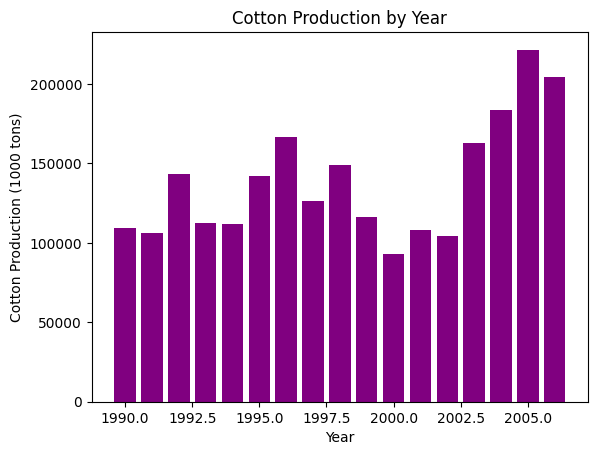

In [64]:
production_by_year = India_train.groupby('Year')['COTTON PRODUCTION (1000 tons)'].sum()
plt.pyplot.bar(production_by_year.index, production_by_year.values,color='purple')
plt.pyplot.xlabel('Year')
plt.pyplot.ylabel('Cotton Production (1000 tons)')
plt.pyplot.title('Cotton Production by Year')
plt.pyplot.show()

<font color='brown'>Interpretation:</font>

<font color='green'>Q]How is the cotton yield distributed?</font>

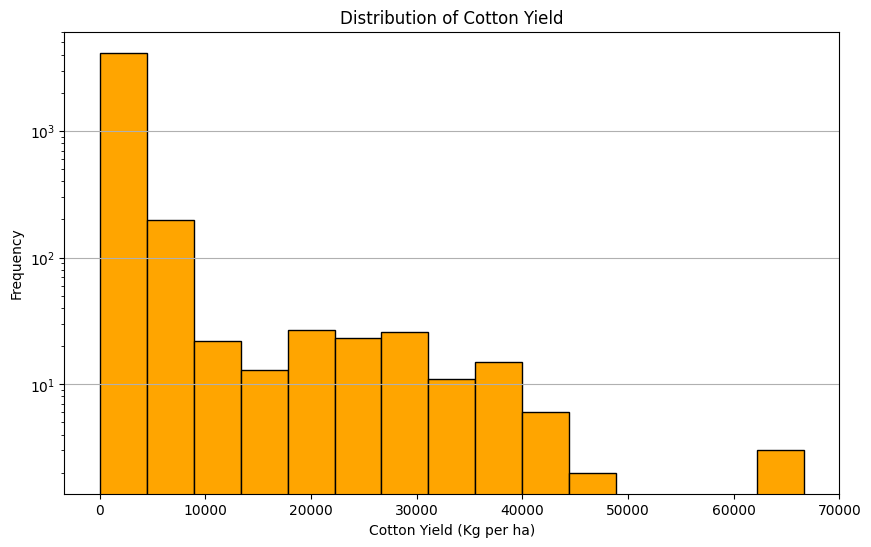

Skewness of Cotton Yield: 5.9271937420421335


In [65]:
from scipy.stats import skew
plt.pyplot.figure(figsize=(10, 6))
plt.pyplot.hist(India_train['COTTON YIELD (Kg per ha)'],color='orange' ,bins=15,edgecolor='black')
plt.pyplot.yscale('log')
plt.pyplot.xlabel('Cotton Yield (Kg per ha)')
plt.pyplot.ylabel('Frequency')
plt.pyplot.grid(axis='y')
plt.pyplot.title('Distribution of Cotton Yield')
plt.pyplot.show()
cotton_yield_skewness = skew(India_train['COTTON YIELD (Kg per ha)'])
print("Skewness of Cotton Yield:", cotton_yield_skewness)

<font color='brown'>Interpretation:</font>

<font color='green'>Q]Which States in India have the highest & lowest Cotton Yield through the years(1990-2006)?</font>

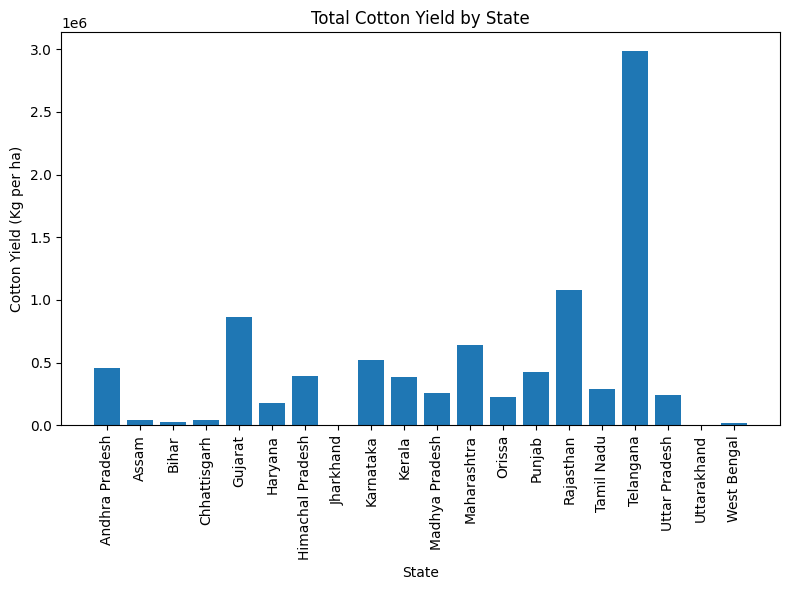

In [66]:
state_cotton_area = India_train.groupby('State Name')['COTTON YIELD (Kg per ha)'].sum()
plt.pyplot.figure(figsize=(8, 6))
plt.pyplot.bar(state_cotton_area.index, state_cotton_area.values)
plt.pyplot.xlabel('State')
plt.pyplot.ylabel('Cotton Yield (Kg per ha)')
plt.pyplot.title('Total Cotton Yield by State')
plt.pyplot.xticks(rotation=90)  
plt.pyplot.tight_layout()  
plt.pyplot.show()

<font color='brown'>Interpretation:</font>

<font color='green'>Q]How does the precipitation (in millimeters) vary across different months of the year.Find the month with highest average rainfall?</font>

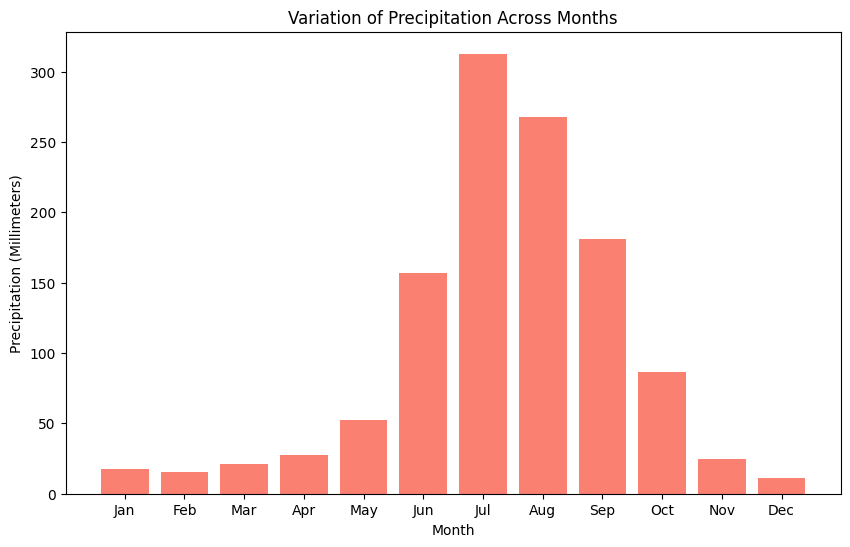

In [67]:
precipitation_cols = ['JANUARY PERCIPITATION (Millimeters)', 'FEBRUARY PERCIPITATION (Millimeters)',
                      'MARCH PERCIPITATION (Millimeters)', 'APRIL PERCIPITATION (Millimeters)',
                      'MAY PERCIPITATION (Millimeters)', 'JUNE PERCIPITATION (Millimeters)',
                      'JULY PERCIPITATION (Millimeters)', 'AUGUST PERCIPITATION (Millimeters)',
                      'SEPTEMBER PERCIPITATION (Millimeters)', 'OCTOBER PERCIPITATION (Millimeters)',
                      'NOVEMBER PERCIPITATION (Millimeters)', 'DECEMBER PERCIPITATION (Millimeters)']

precipitation_data = India_train[precipitation_cols]

monthly_precipitation = precipitation_data.mean()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.pyplot.figure(figsize=(10, 6))
plt.pyplot.bar(months, monthly_precipitation,color='salmon')
plt.pyplot.xlabel('Month')
plt.pyplot.ylabel('Precipitation (Millimeters)')
plt.pyplot.title('Variation of Precipitation Across Months')
plt.pyplot.show()

<font color='brown'>Interpretation:</font>

<font color='green'>Q]How does the temperature(in centigrade) vary across different months of the year.Find the month with highest average max temperature.</font>

Text(0.5, 1.0, 'Variation of Max Temperature Across Months')

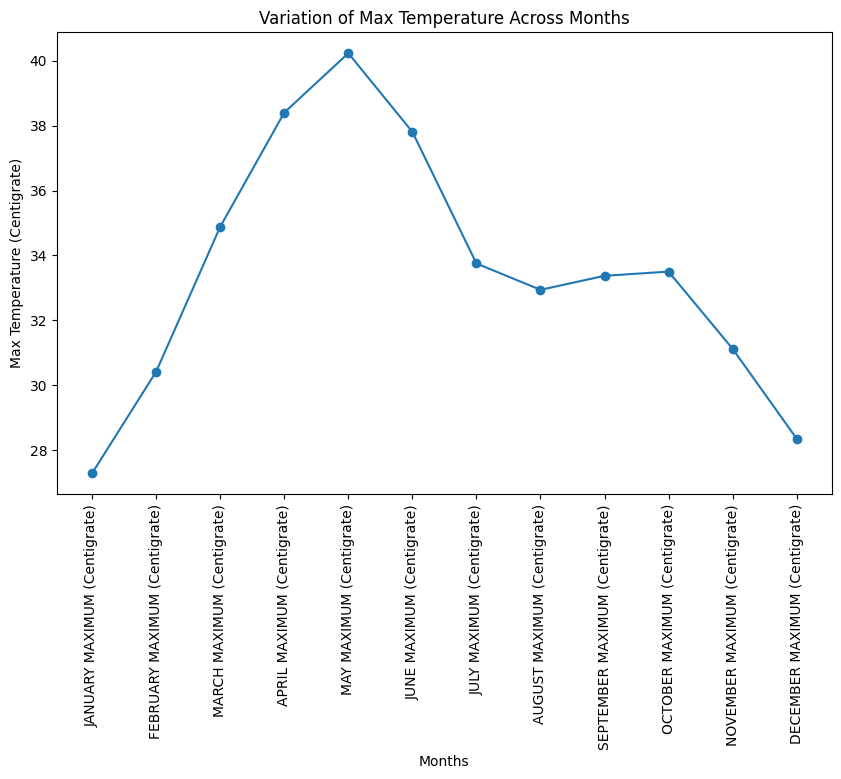

In [68]:
temp_months = ['JANUARY MAXIMUM (Centigrate)', 'FEBRUARY MAXIMUM (Centigrate)', 'MARCH MAXIMUM (Centigrate)',
          'APRIL MAXIMUM (Centigrate)', 'MAY MAXIMUM (Centigrate)', 'JUNE MAXIMUM (Centigrate)',
          'JULY MAXIMUM (Centigrate)', 'AUGUST MAXIMUM (Centigrate)', 'SEPTEMBER MAXIMUM (Centigrate)',
          'OCTOBER MAXIMUM (Centigrate)', 'NOVEMBER MAXIMUM (Centigrate)', 'DECEMBER MAXIMUM (Centigrate)']
max_temp_data = India_train[temp_months]
plt.pyplot.figure(figsize=(10, 6))
plt.pyplot.plot(max_temp_data.mean(), marker='o')
plt.pyplot.xlabel('Months')
plt.pyplot.xticks(rotation=90) 
plt.pyplot.ylabel('Max Temperature (Centigrate)')
plt.pyplot.title('Variation of Max Temperature Across Months')


<font color='brown'>Interpretation:</font>

The line plot shows the variation of temepature across the months in Centigrade.
The temperature increases gradually from January reaching peak in the month of May, then dropping.

<font color='green'>Q]How does the net cropped area and gross cropped area (in 1000 hectares) vary across different states of India?</font>


<Figure size 1000x600 with 0 Axes>

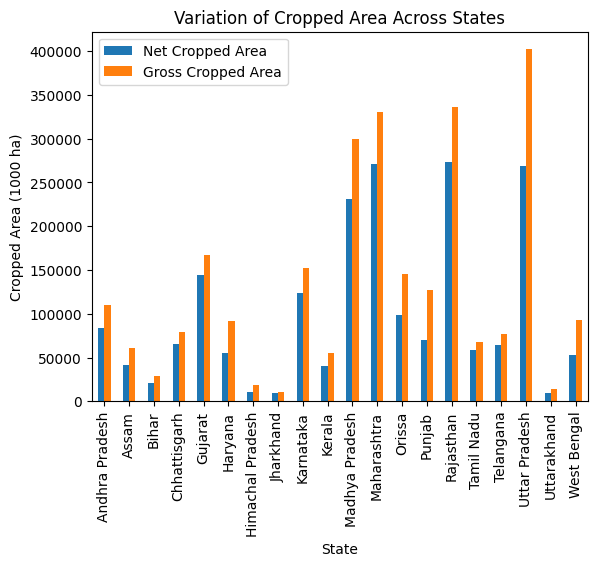

In [69]:
cropped_area_cols = ['State Name', 'NET CROPPED AREA (1000 ha)', 'GROSS CROPPED AREA (1000 ha)']
cropped_area_data = India_train[cropped_area_cols]

statewise_cropped_area = cropped_area_data.groupby('State Name').sum()

# Plot the variation of net cropped area and gross cropped area across states
plt.pyplot.figure(figsize=(10,6))
statewise_cropped_area.plot(kind='bar')
plt.pyplot.xlabel('State')
plt.pyplot.ylabel('Cropped Area (1000 ha)')
plt.pyplot.title('Variation of Cropped Area Across States')
plt.pyplot.xticks(rotation=90)
plt.pyplot.legend(['Net Cropped Area', 'Gross Cropped Area'])
plt.pyplot.show()


<font color='brown'>Interpretation:</font>

<font color='green'>Q]Does consumption of nitrogen,potash or phosphates increase the Cotton yield? Which Nutrient consumption has better yield?</font>

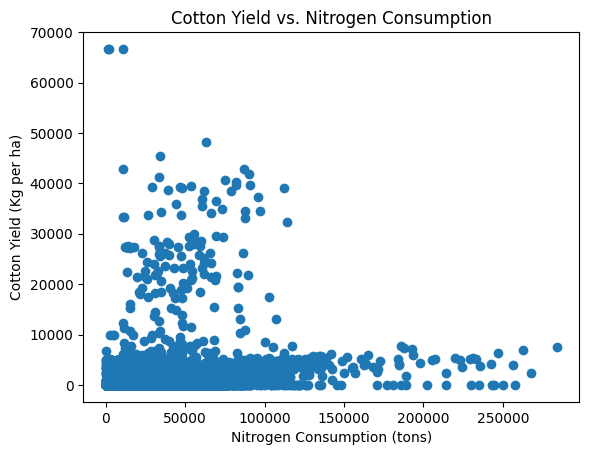

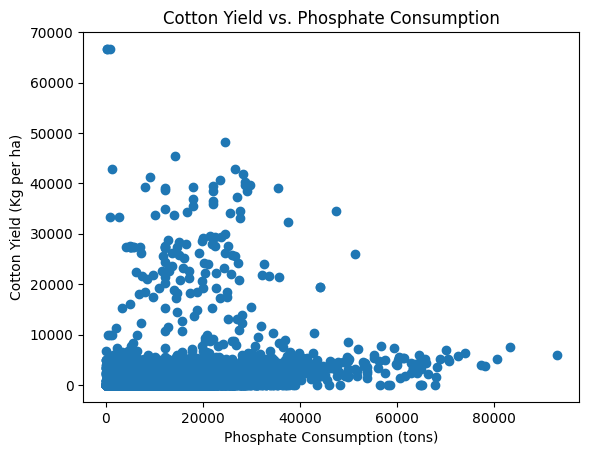

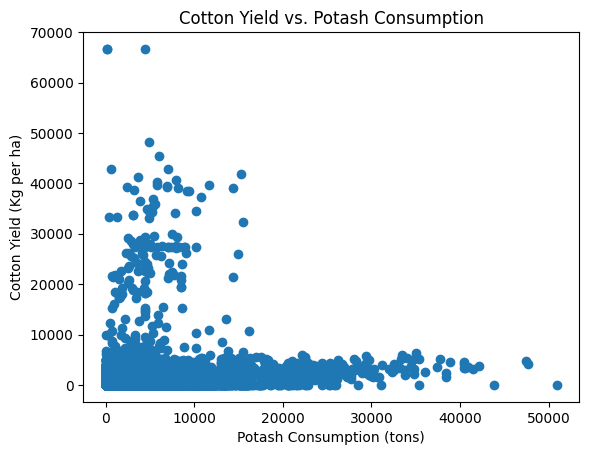

                              COTTON YIELD (Kg per ha)  \
COTTON YIELD (Kg per ha)                      1.000000   
NITROGEN CONSUMPTION (tons)                   0.161183   
PHOSPHATE CONSUMPTION (tons)                  0.181889   
POTASH CONSUMPTION (tons)                     0.087216   

                              NITROGEN CONSUMPTION (tons)  \
COTTON YIELD (Kg per ha)                         0.161183   
NITROGEN CONSUMPTION (tons)                      1.000000   
PHOSPHATE CONSUMPTION (tons)                     0.822634   
POTASH CONSUMPTION (tons)                        0.330865   

                              PHOSPHATE CONSUMPTION (tons)  \
COTTON YIELD (Kg per ha)                          0.181889   
NITROGEN CONSUMPTION (tons)                       0.822634   
PHOSPHATE CONSUMPTION (tons)                      1.000000   
POTASH CONSUMPTION (tons)                         0.516701   

                              POTASH CONSUMPTION (tons)  
COTTON YIELD (Kg per ha)          

In [70]:
cols = ['COTTON YIELD (Kg per ha)', 'NITROGEN CONSUMPTION (tons)', 'PHOSPHATE CONSUMPTION (tons)', 'POTASH CONSUMPTION (tons)']

# Scatter plot: Cotton Yield vs. Nitrogen Consumption
plt.pyplot.scatter(India_train['NITROGEN CONSUMPTION (tons)'], India_train['COTTON YIELD (Kg per ha)'])
plt.pyplot.xlabel('Nitrogen Consumption (tons)')
plt.pyplot.ylabel('Cotton Yield (Kg per ha)')
plt.pyplot.title('Cotton Yield vs. Nitrogen Consumption')
plt.pyplot.show()

# Scatter plot: Cotton Yield vs. Phosphate Consumption
plt.pyplot.scatter(India_train['PHOSPHATE CONSUMPTION (tons)'], India_train['COTTON YIELD (Kg per ha)'])
plt.pyplot.xlabel('Phosphate Consumption (tons)')
plt.pyplot.ylabel('Cotton Yield (Kg per ha)')
plt.pyplot.title('Cotton Yield vs. Phosphate Consumption')
plt.pyplot.show()

# Scatter plot: Cotton Yield vs. Potash Consumption
plt.pyplot.scatter(India_train['POTASH CONSUMPTION (tons)'], India_train['COTTON YIELD (Kg per ha)'])
plt.pyplot.xlabel('Potash Consumption (tons)')
plt.pyplot.ylabel('Cotton Yield (Kg per ha)')
plt.pyplot.title('Cotton Yield vs. Potash Consumption')
plt.pyplot.show()

subset_data = India_train[cols]

correlations = subset_data.corr()
print(correlations)


<font color='brown'>Interpretation:</font>

<font color='brown'>Interpretation:</font>

In [71]:
India_train['AVERAGE RAINFALL'] = India_train.iloc[:, 7:19].mean(axis=1)
India_train['AVERAGE Min Tempearture'] = India_train.iloc[:, 19:31].mean(axis=1)
India_train['AVERAGE Max Temperature']= India_train.iloc[:, 31:43].mean(axis=1)
India_train['AVERAGE WATER DEFICIT']= India_train.iloc[:, 43:54].mean(axis=1)
India_train['AVERAGE WATER DEFICIT']= India_train.iloc[:, 43:54].mean(axis=1)

In [72]:
cols=['COTTON PRODUCTION (1000 tons)','COTTON YIELD (Kg per ha)','AVERAGE RAINFALL','AVERAGE Min Tempearture','AVERAGE Max Temperature','AVERAGE WATER DEFICIT','AVERAGE WATER DEFICIT'
                ,'TOTAL CONSUMPTION (tons)','TOTAL PER HA OF NCA (Kg per ha)','TOTAL PER HA OF NCA (Kg per ha)','TOTAL PER HA OF GCA (Kg per ha)']


ValueError: Wedge sizes 'x' must be non negative values

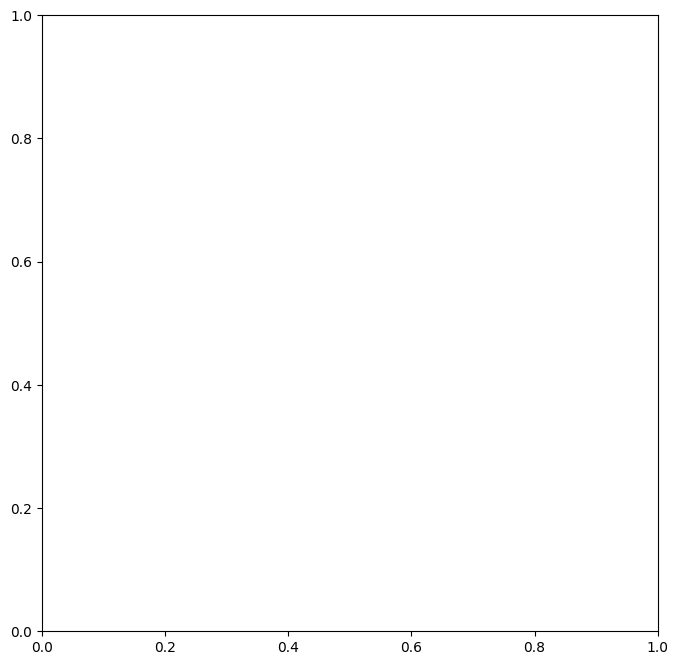

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("India_train.csv")

# Calculate the total cotton production per state
state_production = data.groupby('State Name')['COTTON PRODUCTION (1000 tons)'].sum()

# Create a pie chart
plt.figure(figsize=(12, 8))
plt.pie(state_production, labels=state_production.index, autopct='%1.1f%%', startangle=90,rotatelabels=30,labeldistance=1.05, pctdistance=0.85)
plt.title('Distribution of Cotton Production by State',pad=67)
plt.axis('equal')
plt.tight_layout(pad=2)
plt.show()


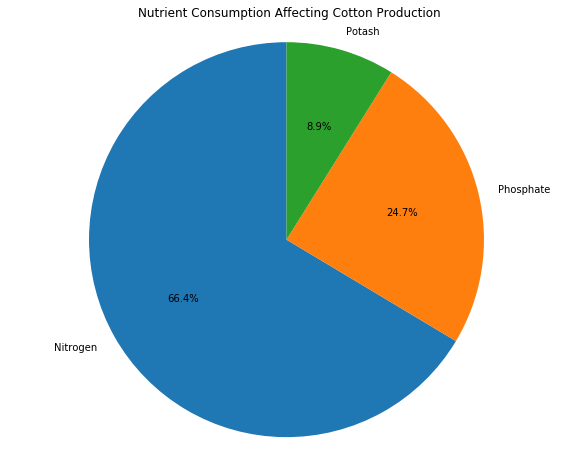

In [ ]:

nutrients = ['Nitrogen', 'Phosphate', 'Potash']
consumption = [
    India_train['NITROGEN CONSUMPTION (tons)'].sum(),
    India_train['PHOSPHATE CONSUMPTION (tons)'].sum(),
    India_train['POTASH CONSUMPTION (tons)'].sum()
]

plt.figure(figsize=(10, 8))
plt.pie(consumption, labels=nutrients, autopct='%1.1f%%', startangle=90)
plt.title('Nutrient Consumption Affecting Cotton Production')

plt.axis('equal')

# Display the chart
plt.show()



Q]Which nutrient consumption leads to better Cotton Yield?

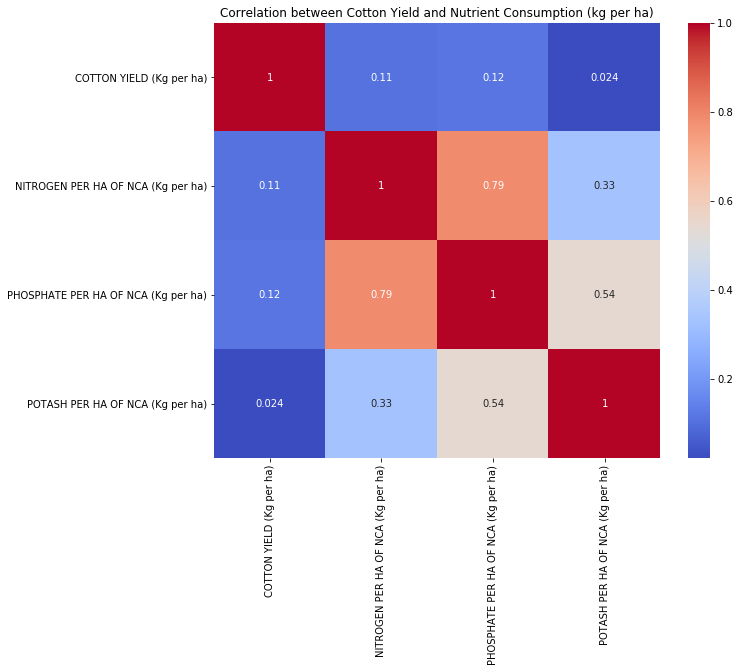

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns from the dataset
columns = ['COTTON YIELD (Kg per ha)', 'NITROGEN PER HA OF NCA (Kg per ha)', 'PHOSPHATE PER HA OF NCA (Kg per ha)', 'POTASH PER HA OF NCA (Kg per ha)']
data = India_train[columns]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Cotton Yield and Nutrient Consumption (kg per ha)')
plt.show()


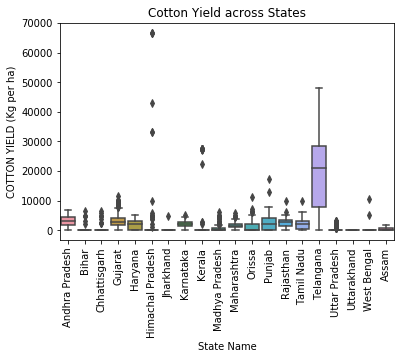

In [ ]:
rainfall_data = ['JANUARY PRECIPITATION (Millimeters)', 'FEBRUARY PRECIPITATION (Millimeters)', 'MARCH PRECIPITATION (Millimeters)', 'APRIL PRECIPITATION (Millimeters)', 'MAY PRECIPITATION (Millimeters)', 'JUNE PRECIPITATION (Millimeters)', 'JULY PRECIPITATION (Millimeters)', 'AUGUST PRECIPITATION (Millimeters)', 'SEPTEMBER PRECIPITATION (Millimeters)', 'OCTOBER PRECIPITATION (Millimeters)', 'NOVEMBER PRECIPITATION (Millimeters)', 'DECEMBER PRECIPITATION (Millimeters)']


In [ ]:
precipitation_cols = ['JANUARY PERCIPITATION (Millimeters)', 'FEBRUARY PERCIPITATION (Millimeters)',
                      'MARCH PERCIPITATION (Millimeters)', 'APRIL PERCIPITATION (Millimeters)',
                      'MAY PERCIPITATION (Millimeters)', 'JUNE PERCIPITATION (Millimeters)',
                      'JULY PERCIPITATION (Millimeters)', 'AUGUST PERCIPITATION (Millimeters)',
                      'SEPTEMBER PERCIPITATION (Millimeters)', 'OCTOBER PERCIPITATION (Millimeters)',
                      'NOVEMBER PERCIPITATION (Millimeters)', 'DECEMBER PERCIPITATION (Millimeters)']

precipitation_data = India_train[precipitation_cols]

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


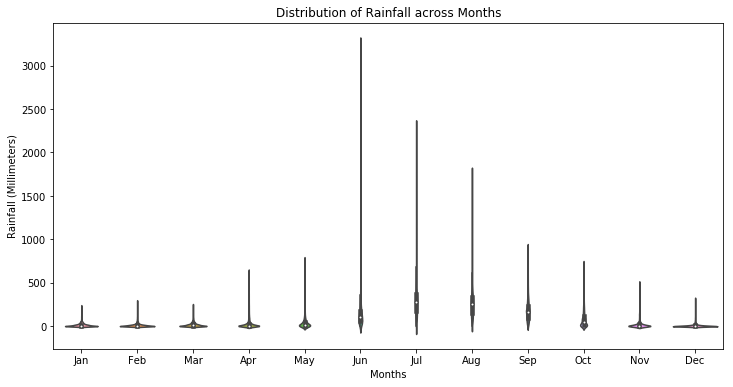

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the rainfall data for plotting
rainfall_data_reshaped =precipitation_data.melt(var_name='Month', value_name='Rainfall')

# Plot the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Month', y='Rainfall', data=rainfall_data_reshaped)
plt.xlabel('Months')
plt.ylabel('Rainfall (Millimeters)')
plt.title('Distribution of Rainfall across Months')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
